In [5]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Standalone Keras version:", keras.__version__)


TensorFlow version: 2.18.0
Standalone Keras version: 3.7.0


In [2]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


## Import required libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [6]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [7]:
cur_path

'C:\\Traffic_Sign_Recognition'

## Preprocess the images

In [8]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [9]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [10]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

C:\Users\hamza\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.4381 - loss: 2.4622 - val_accuracy: 0.9306 - val_loss: 0.2385
Epoch 2/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8464 - loss: 0.5149 - val_accuracy: 0.9723 - val_loss: 0.1028
Epoch 3/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9060 - loss: 0.3224 - val_accuracy: 0.9765 - val_loss: 0.0816
Epoch 4/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9248 - loss: 0.2660 - val_accuracy: 0.9669 - val_loss: 0.1168
Epoch 5/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9298 - loss: 0.2502 - val_accuracy: 0.9781 - val_loss: 0.0732
Epoch 6/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9369 - loss: 0.2294 - val_accuracy: 0.9876 - val_loss: 0.0379
Epoch 7/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9442 - loss: 0.2132 - val_accuracy: 0.9814 - val_loss: 0.0585
Epoch 8/20
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9438 -

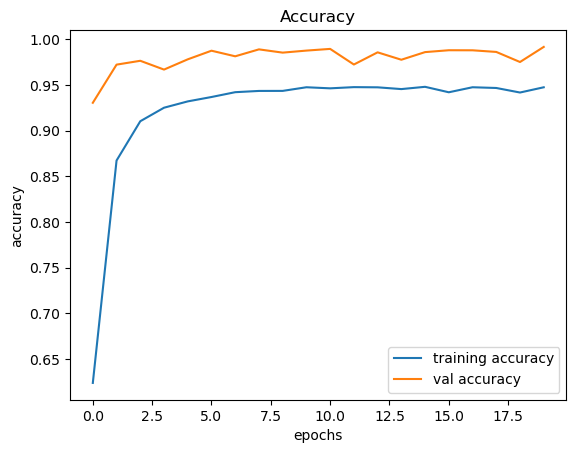

In [19]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

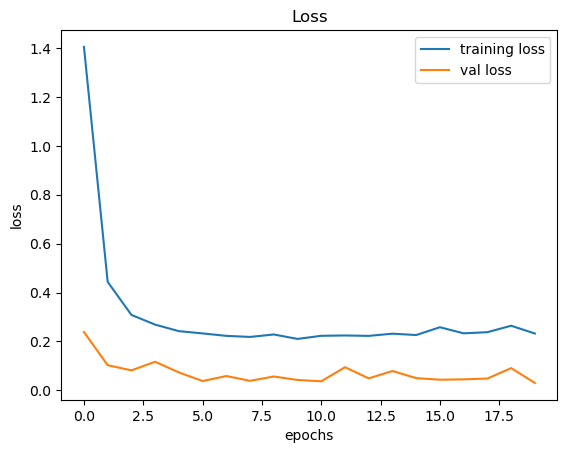

In [20]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
X_test, label = testing('Test.csv')

In [26]:
import numpy as np

# Predict probabilities for each class
Y_pred = model.predict(X_test)

# Convert probabilities to class labels (take the index of the highest probability)
Y_pred = np.argmax(Y_pred, axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


## Accuracy with the test data

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.949089469517023


## Save the model

In [29]:
model.save("./training/TSR.h5")

In [30]:
import os

# Check if the model file exists
print(os.path.exists("./training/TSR.h5"))


True


## Load the Model

In [32]:
import os
os.chdir(r'C:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [33]:
import os
print(os.path.exists('./training/TSR.h5'))  # This should return True if the file exists


True


In [34]:
model.summary()  # This will print the model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,253 (946.30 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted traffic sign is:  Keep right


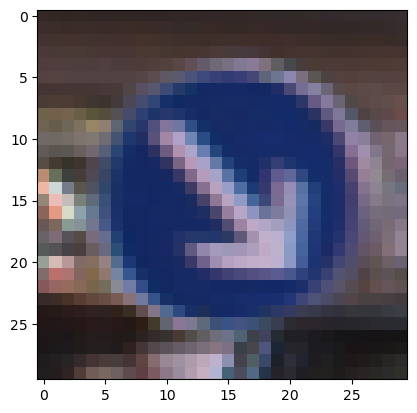

In [78]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)

    # Get the prediction probabilities
    Y_pred = model.predict(X_test)

    # Get the class with the highest probability
    predicted_class = np.argmax(Y_pred, axis=1)  # This returns the index of the highest probability
    return image, predicted_class[0]  # Return the image and predicted class index

# Example usage
plot, prediction = test_on_img(r'C:\Traffic_Sign_Recognition\Test\00002.png')
print("Predicted traffic sign is: ", classes[prediction])
plt.imshow(plot)
plt.show()
